In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries
%load_ext autoreload
%autoreload 2

/home/reut/virtualenv/py-keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path

In [3]:
working_csv = 'hist2_out.csv'
original_csv = 'IWM-history2.csv'

In [4]:
# create formated csv file if it does not exist
if not os.path.isfile(working_csv):
    df = pd.read_csv(original_csv)
    close = df['Adj Close']
    close.to_csv(working_csv, index=False)

In [5]:
def stock_lstm(window_size=50, predict_len=50, lstm_par1=50, lstm_par2=100, epoch=15, model=None, X_train=None, y_train=None, X_test=None, y_test=None):

    # create a new model if one wasn't provided
    if model==None:
        X_train, y_train, X_test, y_test = lstm.load_data(working_csv, window_size, True)
        model = Sequential()

        model.add(LSTM(
            input_dim=1,
            output_dim=lstm_par1,
            return_sequences=True))
        model.add(Dropout(0.2))

        model.add(LSTM(
            lstm_par2,
            return_sequences=False))
        model.add(Dropout(0.2))

        model.add(Dense(
            output_dim=1))
        model.add(Activation('linear'))

        start = time.time()
        model.compile(loss='mse', optimizer='rmsprop')
        print('compilation time : ', time.time() - start)
    
    #Step 3 Train the model
    model.fit(
        X_train,
        y_train,
        batch_size=512,
        nb_epoch=epoch,
        validation_split=0.05)
    
    #Step 4 - Plot the predictions!
    predictions = lstm.predict_sequences_multiple(model, X_test, window_size, predict_len)
    lstm.plot_results_multiple(predictions, y_test, predict_len)
    
    cache = (X_train, y_train, X_test, y_test, model, predictions)
    return cache

compilation time :  0.01746201515197754
Train on 3808 samples, validate on 201 samples
Epoch 1/20
3808/3808 [==============================] - 8s 2ms/step - loss: 1.1848 - val_loss: 0.7924
Epoch 2/20
3808/3808 [==============================] - 6s 1ms/step - loss: 0.6672 - val_loss: 0.6702
Epoch 3/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.5612 - val_loss: 0.5946
Epoch 4/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.5012 - val_loss: 0.5291
Epoch 5/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.4375 - val_loss: 0.4506
Epoch 6/20
3808/3808 [==============================] - 6s 1ms/step - loss: 0.3938 - val_loss: 0.4066
Epoch 7/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.3620 - val_loss: 0.3239
Epoch 8/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.3194 - val_loss: 0.3041
Epoch 9/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2985 - val_loss: 0.

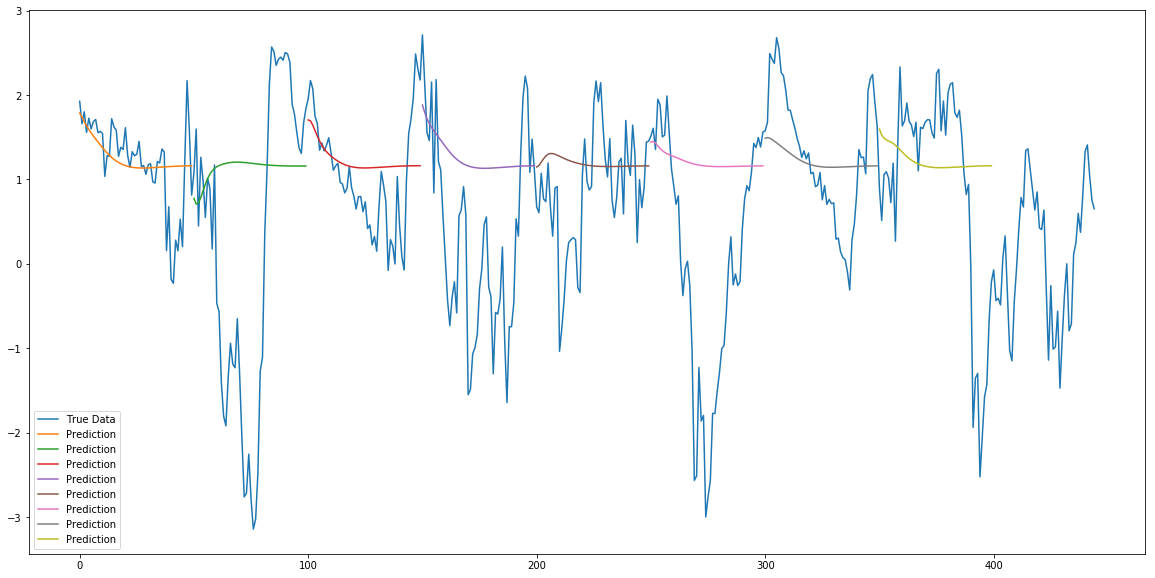

In [6]:
cache1 = stock_lstm(window_size=50, predict_len=50, lstm_par1=100, lstm_par2=100, epoch=20)

compilation time :  0.03696417808532715
Train on 3765 samples, validate on 199 samples
Epoch 1/20
3765/3765 [==============================] - 12s 3ms/step - loss: 0.9368 - val_loss: 0.4059
Epoch 2/20
3765/3765 [==============================] - 12s 3ms/step - loss: 0.4503 - val_loss: 0.3813
Epoch 3/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.3953 - val_loss: 0.2991
Epoch 4/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.3396 - val_loss: 0.2852
Epoch 5/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.3206 - val_loss: 0.2533
Epoch 6/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.2798 - val_loss: 0.2192
Epoch 7/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.2745 - val_loss: 0.1976
Epoch 8/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.2491 - val_loss: 0.2590
Epoch 9/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.2404 - val

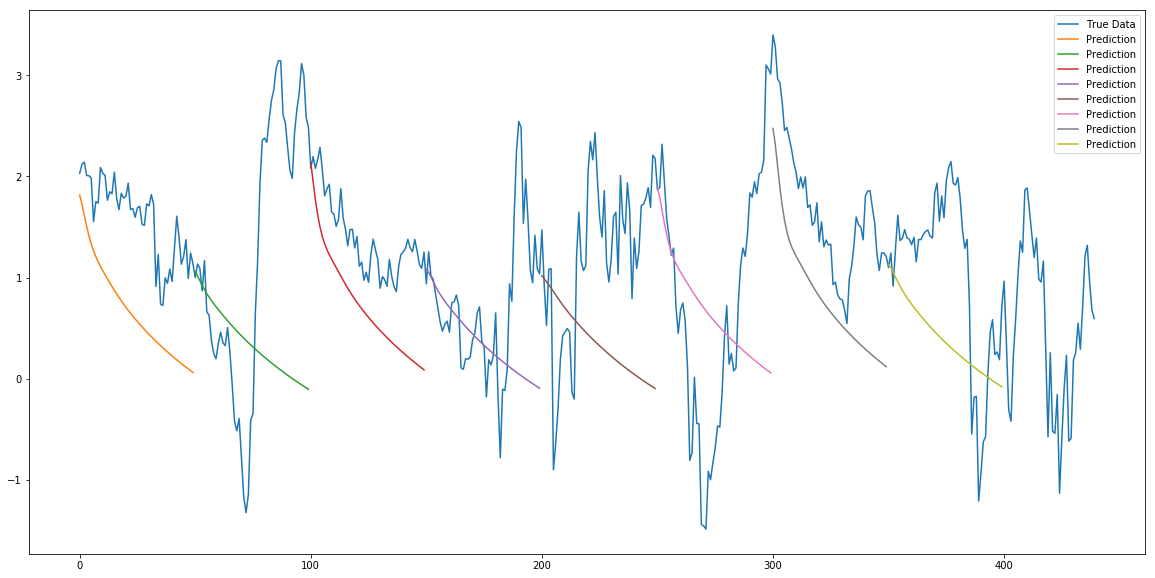

In [7]:
cache2 = stock_lstm(window_size=100, predict_len=50, lstm_par1=100, lstm_par2=100, epoch=20)

compilation time :  0.01727890968322754
Train on 3723 samples, validate on 196 samples
Epoch 1/20
3723/3723 [==============================] - 30s 8ms/step - loss: 1.2869 - val_loss: 0.4684
Epoch 2/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.3638 - val_loss: 0.3808
Epoch 3/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.2960 - val_loss: 0.3425
Epoch 4/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.2588 - val_loss: 0.3402
Epoch 5/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.2637 - val_loss: 0.3048
Epoch 6/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.2262 - val_loss: 0.2466
Epoch 7/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.2492 - val_loss: 0.2353
Epoch 8/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.1864 - val_loss: 0.2226
Epoch 9/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.1894 - val

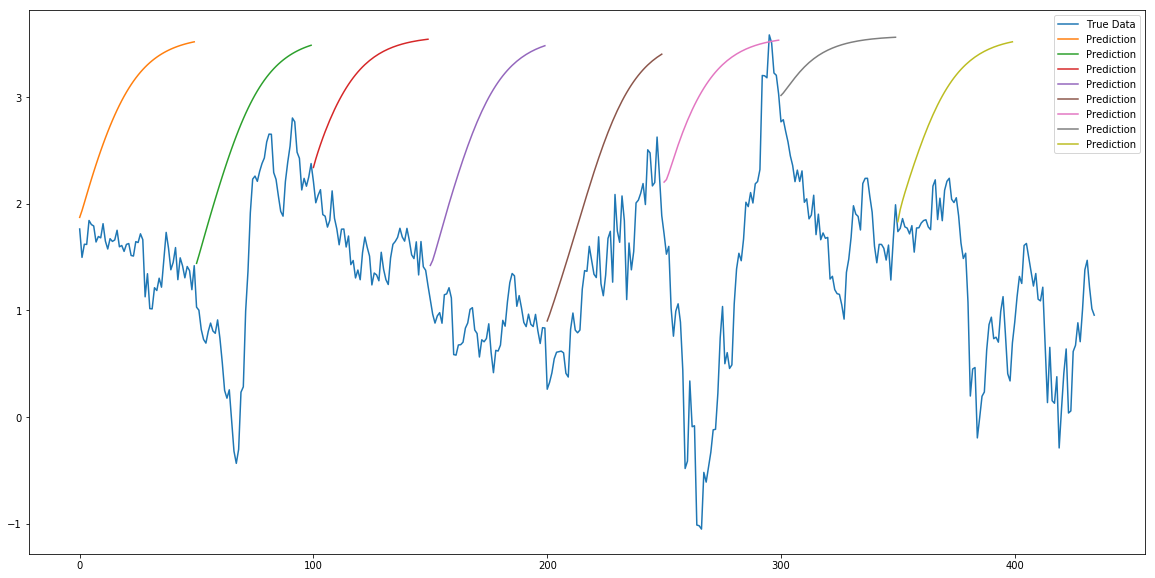

In [8]:
cache3 = stock_lstm(window_size=150, predict_len=50, lstm_par1=150, lstm_par2=150, epoch=20)

compilation time :  0.017299652099609375
Train on 3808 samples, validate on 201 samples
Epoch 1/20
3808/3808 [==============================] - 5s 1ms/step - loss: 1.1371 - val_loss: 0.6957
Epoch 2/20
3808/3808 [==============================] - 3s 919us/step - loss: 0.6856 - val_loss: 0.5424
Epoch 3/20
3808/3808 [==============================] - 3s 917us/step - loss: 0.6012 - val_loss: 0.4590
Epoch 4/20
3808/3808 [==============================] - 3s 918us/step - loss: 0.5200 - val_loss: 0.4218
Epoch 5/20
3808/3808 [==============================] - 4s 974us/step - loss: 0.4641 - val_loss: 0.3434
Epoch 6/20
3808/3808 [==============================] - 4s 956us/step - loss: 0.4201 - val_loss: 0.2898
Epoch 7/20
3808/3808 [==============================] - 4s 929us/step - loss: 0.3819 - val_loss: 0.2672
Epoch 8/20
3808/3808 [==============================] - 4s 923us/step - loss: 0.3622 - val_loss: 0.2361
Epoch 9/20
3808/3808 [==============================] - 4s 922us/step - loss: 0.33

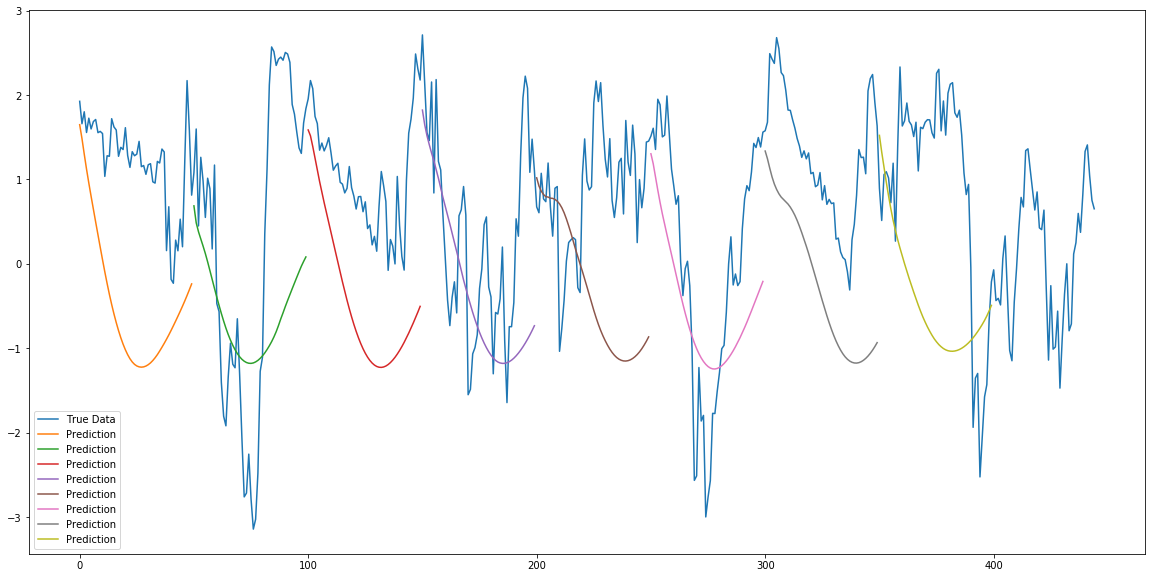

In [9]:
cache4 = stock_lstm(window_size=50, predict_len=50, lstm_par1=50, lstm_par2=100, epoch=20)

compilation time :  0.017408132553100586
Train on 3765 samples, validate on 199 samples
Epoch 1/20
3765/3765 [==============================] - 31s 8ms/step - loss: 1.8708 - val_loss: 0.4489
Epoch 2/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.4504 - val_loss: 0.3541
Epoch 3/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.3707 - val_loss: 0.3522
Epoch 4/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.3314 - val_loss: 0.3083
Epoch 5/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.2995 - val_loss: 0.3162
Epoch 6/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.2927 - val_loss: 0.2576
Epoch 7/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.2765 - val_loss: 0.2673
Epoch 8/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.2463 - val_loss: 0.2560
Epoch 9/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.2596 - va

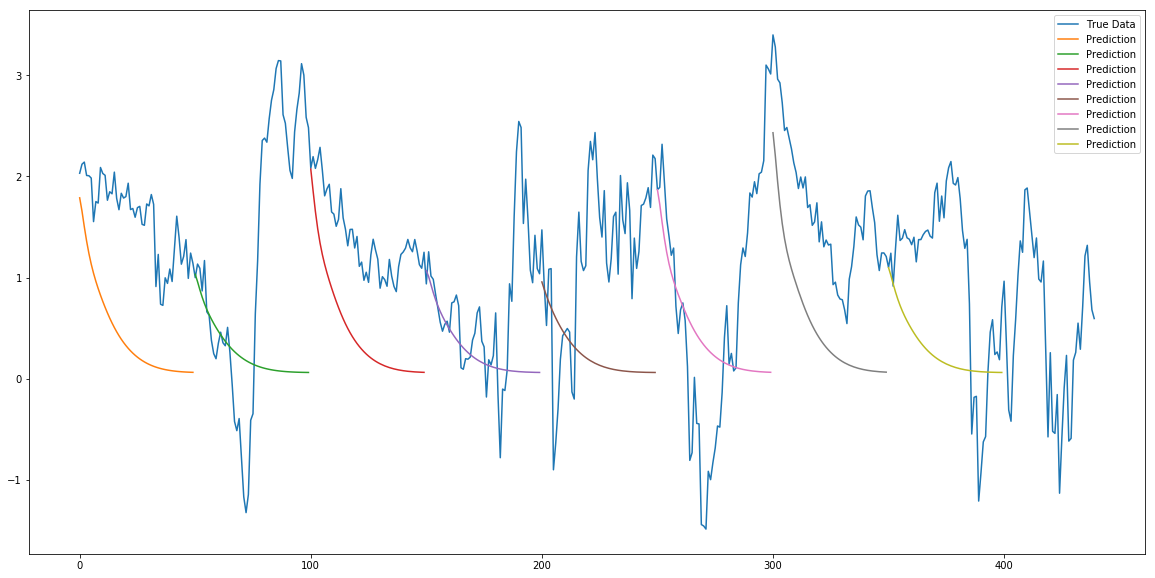

In [10]:
cache5 = stock_lstm(window_size=100, predict_len=50, lstm_par1=150, lstm_par2=250, epoch=20)

Train on 3808 samples, validate on 201 samples
Epoch 1/20
3808/3808 [==============================] - 6s 1ms/step - loss: 0.2355 - val_loss: 0.2162
Epoch 2/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2277 - val_loss: 0.2152
Epoch 3/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2339 - val_loss: 0.2136
Epoch 4/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2287 - val_loss: 0.2103
Epoch 5/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2265 - val_loss: 0.2210
Epoch 6/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2276 - val_loss: 0.2142
Epoch 7/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2217 - val_loss: 0.2453
Epoch 8/20
3808/3808 [==============================] - 6s 1ms/step - loss: 0.2276 - val_loss: 0.2107
Epoch 9/20
3808/3808 [==============================] - 5s 1ms/step - loss: 0.2240 - val_loss: 0.2124
Epoch 10/20
3808/3808 [============

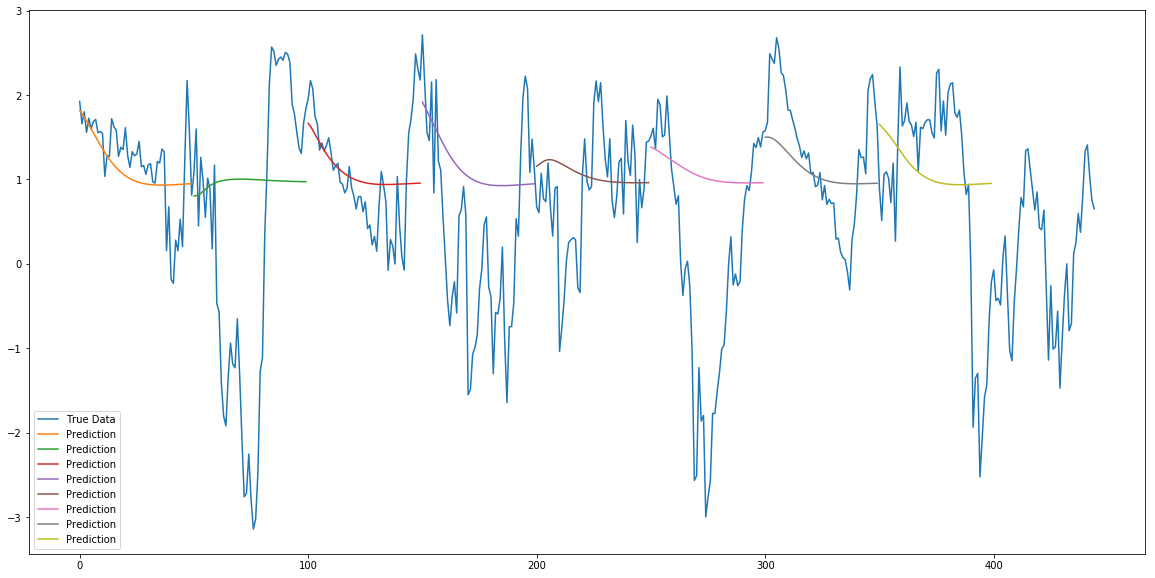

In [11]:
X_train1, y_train1, X_test1, y_test1, model1, _ = cache1
cache12 = stock_lstm(window_size=50, predict_len=50, lstm_par1=100, lstm_par2=100, epoch=20, model=model1, X_train=X_train1, y_train=y_train1, X_test=X_test1, y_test=y_test1)

Train on 3765 samples, validate on 199 samples
Epoch 1/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1371 - val_loss: 0.1189
Epoch 2/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1447 - val_loss: 0.1067
Epoch 3/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1394 - val_loss: 0.1328
Epoch 4/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1365 - val_loss: 0.1160
Epoch 5/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1408 - val_loss: 0.1081
Epoch 6/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1291 - val_loss: 0.1167
Epoch 7/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1403 - val_loss: 0.1109
Epoch 8/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1342 - val_loss: 0.1128
Epoch 9/20
3765/3765 [==============================] - 11s 3ms/step - loss: 0.1312 - val_loss: 0.1305
Epoch 10/20
3765/3765 [===

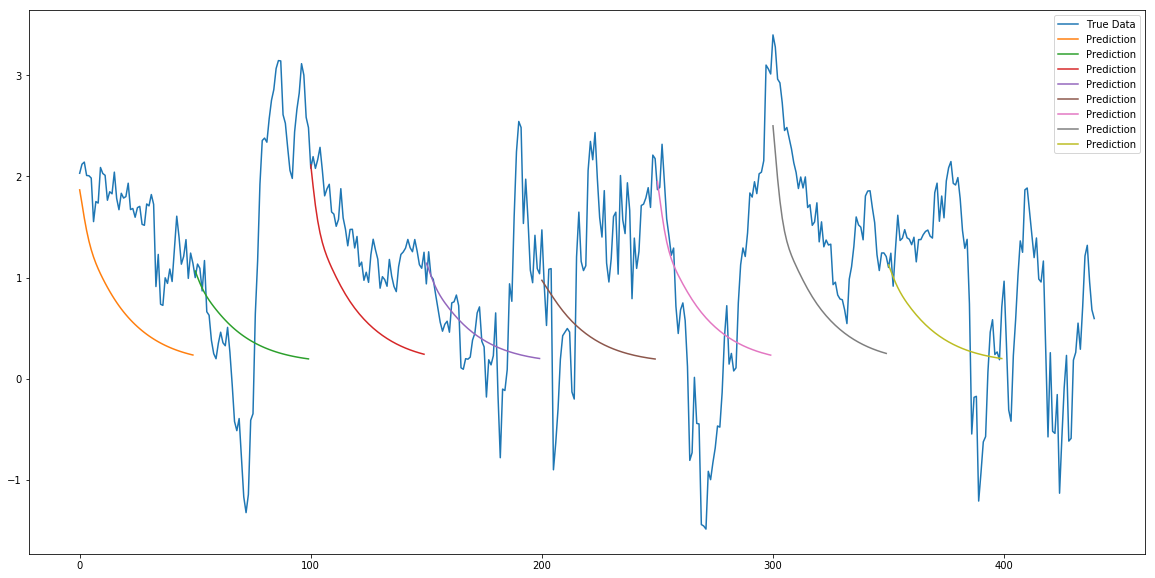

In [12]:
X_train2, y_train2, X_test2, y_test2, model2, _ = cache2
cache22 = stock_lstm(window_size=100, predict_len=50, lstm_par1=100, lstm_par2=100, epoch=20, model=model2, X_train=X_train2, y_train=y_train2, X_test=X_test2, y_test=y_test2)

Train on 3723 samples, validate on 196 samples
Epoch 1/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.1070 - val_loss: 0.1451
Epoch 2/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.1076 - val_loss: 0.1460
Epoch 3/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.1082 - val_loss: 0.1377
Epoch 4/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.1080 - val_loss: 0.1698
Epoch 5/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.0991 - val_loss: 0.1644
Epoch 6/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.1078 - val_loss: 0.1190
Epoch 7/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.0946 - val_loss: 0.1221
Epoch 8/20
3723/3723 [==============================] - 28s 8ms/step - loss: 0.1035 - val_loss: 0.1126
Epoch 9/20
3723/3723 [==============================] - 29s 8ms/step - loss: 0.1105 - val_loss: 0.1177
Epoch 10/20
3723/3723 [===

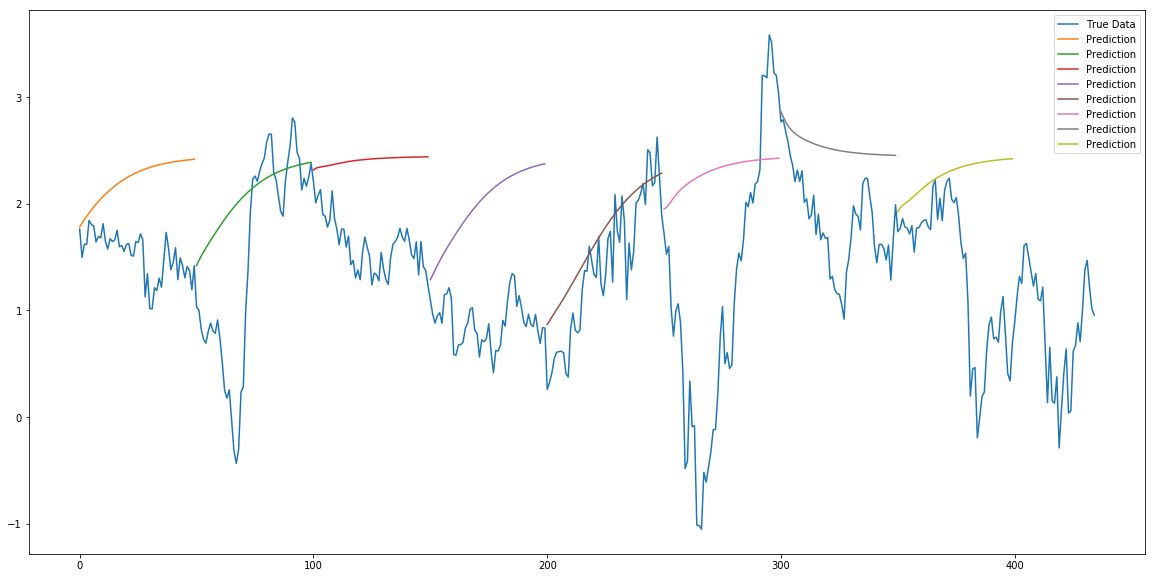

In [13]:
X_train3, y_train3, X_test3, y_test3, model3, _ = cache3
cache32 = stock_lstm(window_size=150, predict_len=50, lstm_par1=150, lstm_par2=150, epoch=20, model=model3, X_train=X_train3, y_train=y_train3, X_test=X_test3, y_test=y_test3)

Train on 3808 samples, validate on 201 samples
Epoch 1/20
3808/3808 [==============================] - 4s 948us/step - loss: 0.2505 - val_loss: 0.1737
Epoch 2/20
3808/3808 [==============================] - 4s 930us/step - loss: 0.2400 - val_loss: 0.2009
Epoch 3/20
3808/3808 [==============================] - 4s 932us/step - loss: 0.2431 - val_loss: 0.1724
Epoch 4/20
3808/3808 [==============================] - 4s 928us/step - loss: 0.2384 - val_loss: 0.1769
Epoch 5/20
3808/3808 [==============================] - 4s 951us/step - loss: 0.2330 - val_loss: 0.1864
Epoch 6/20
3808/3808 [==============================] - 4s 935us/step - loss: 0.2412 - val_loss: 0.1721
Epoch 7/20
3808/3808 [==============================] - 4s 937us/step - loss: 0.2307 - val_loss: 0.1865
Epoch 8/20
3808/3808 [==============================] - 4s 936us/step - loss: 0.2379 - val_loss: 0.1695
Epoch 9/20
3808/3808 [==============================] - 4s 931us/step - loss: 0.2329 - val_loss: 0.1705
Epoch 10/20
3808/

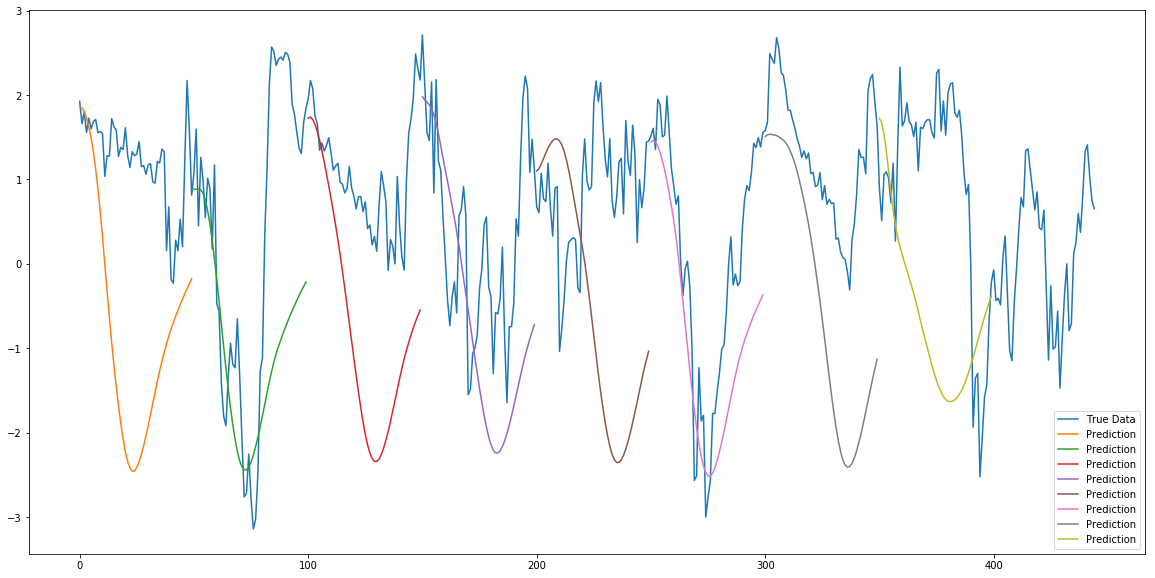

In [14]:
X_train4, y_train4, X_test4, y_test4, model4, _ = cache4
cache42 = stock_lstm(window_size=50, predict_len=50, lstm_par1=50, lstm_par2=100, epoch=20, model=model4, X_train=X_train4, y_train=y_train4, X_test=X_test4, y_test=y_test4)

Train on 3765 samples, validate on 199 samples
Epoch 1/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1369 - val_loss: 0.1333
Epoch 2/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1430 - val_loss: 0.1252
Epoch 3/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1280 - val_loss: 0.1353
Epoch 4/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1404 - val_loss: 0.1182
Epoch 5/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1357 - val_loss: 0.1182
Epoch 6/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1278 - val_loss: 0.1254
Epoch 7/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1395 - val_loss: 0.1190
Epoch 8/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1275 - val_loss: 0.1649
Epoch 9/20
3765/3765 [==============================] - 29s 8ms/step - loss: 0.1305 - val_loss: 0.1221
Epoch 10/20
3765/3765 [===

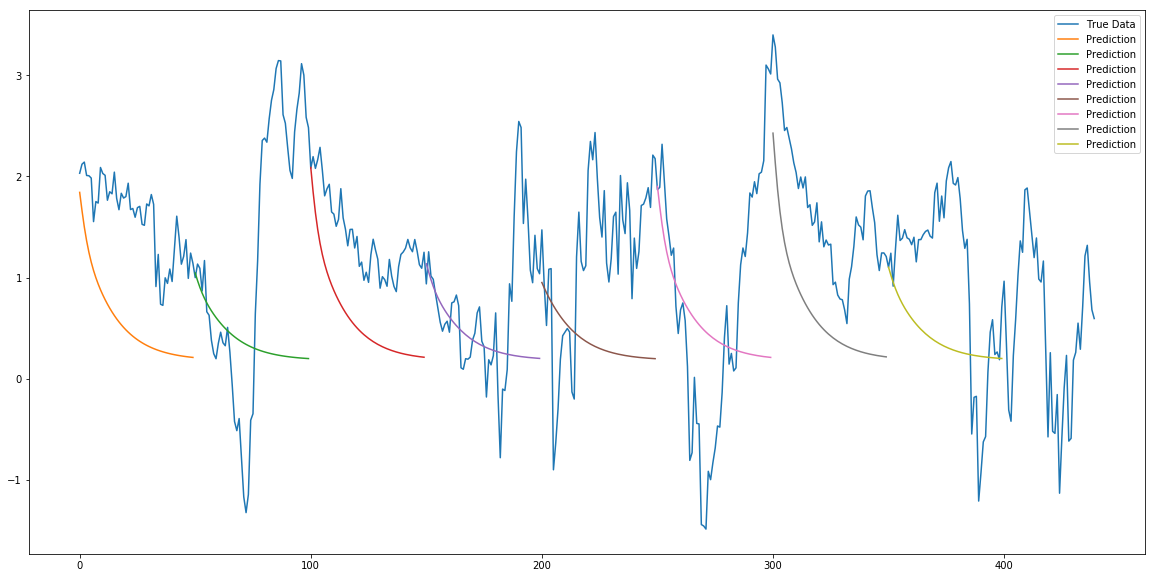

In [15]:
X_train5, y_train5, X_test5, y_test5, model5, _ = cache5
cache52 = stock_lstm(window_size=100, predict_len=50, lstm_par1=150, lstm_par2=250, epoch=20, model=model5, X_train=X_train5, y_train=y_train5, X_test=X_test5, y_test=y_test5)